In [38]:
import pyarrow.parquet as pq
import pandas as pd

In [39]:
prom_file_path = "/mnt/sdc/xiaoyu/prom_extr_att.parquet"

In [40]:
data = pd.read_parquet(prom_file_path)

In [41]:
#Group the data by 'timestamp' and 'node', and aggregate the 'power_consumption'

grouped_data = data.groupby(['timestamp'])['surfsara_power_usage'].sum().reset_index()

#The 'grouped_data' DataFrame now contains the power consumption for each node for each timestamp
grouped_data.head()

,timestamp,surfsara_power_usage
0,2022-06-30 16:00:30,32212.0
1,2022-06-30 16:01:00,32288.0
2,2022-06-30 16:01:30,32288.0
3,2022-06-30 16:02:00,32288.0
4,2022-06-30 16:02:30,32288.0


In [52]:
# Assuming df is your DataFrame and 'time' is your datetime column
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Create an 'hour' column
data['hour'] = data['timestamp'].dt.hour

# Group by the 'hour' column and calculate the mean power usage
df_hourly = data.groupby('hour')['surfsara_power_usage'].mean().reset_index()


In [53]:
import pandas as pd


data['hour'] = data['timestamp'].dt.hour

df_hourly = data.groupby('hour')['surfsara_power_usage'].sum().reset_index()



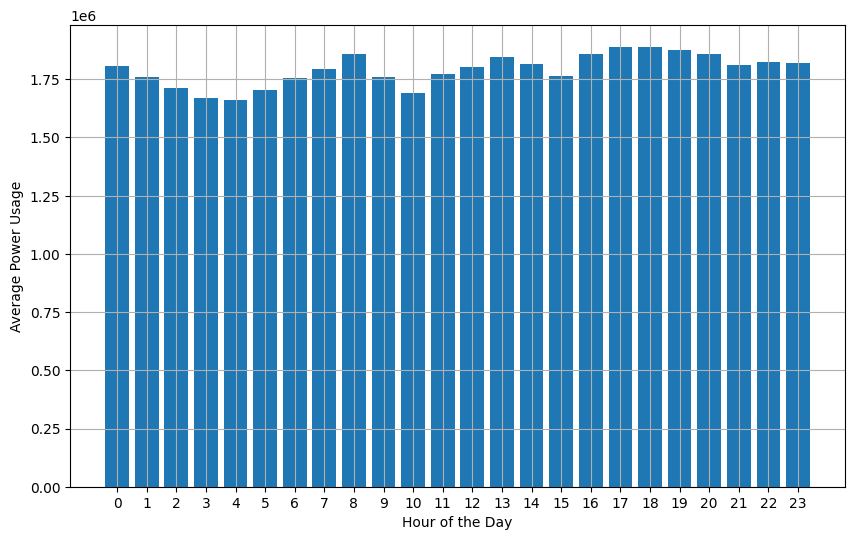

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.bar(df_hourly['hour'], df_hourly['surfsara_power_usage'])
plt.xlabel('Hour of the Day')
plt.ylabel('Average Power Usage')
plt.xticks(range(0, 24))  
plt.grid(True)
plt.show()


In [55]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Define your date range
start_date = '2022-10-08 09:00:00'
end_date = '2022-10-09 09:00:00'

# Create a mask that selects only the dates within your range
mask = (data['timestamp'] >= start_date) & (data['timestamp'] <= end_date)

# Apply the mask to your dataframe to get only the rows within your date range
data = data.loc[mask]

# data = data.loc['2022-08-09 09:00:00':'2022-08-15 09:00:00']

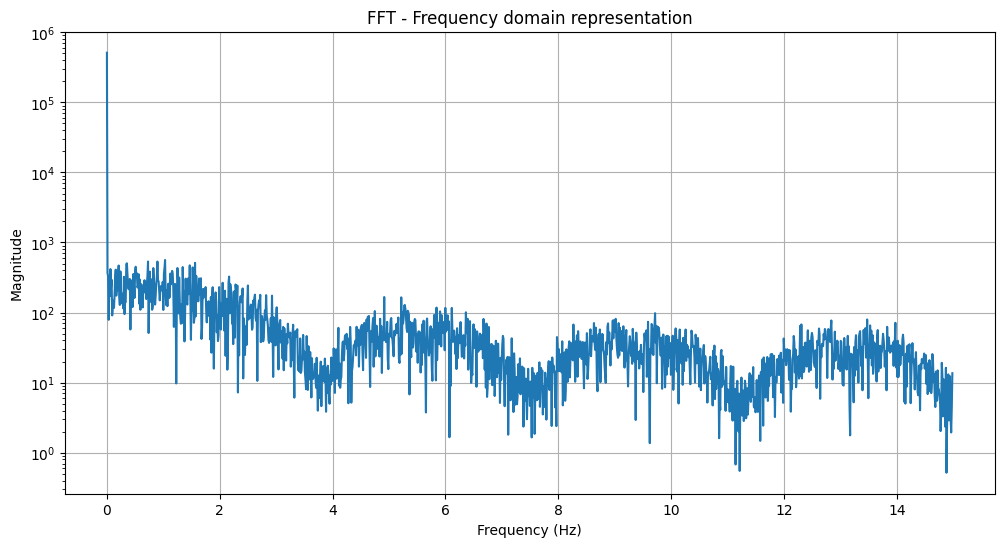

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming data['surfsara_power_usage'] contains your time series data

# Perform the Fast Fourier Transform (FFT)
fft_result = np.fft.fft(data['surfsara_power_usage'])

# Compute the absolute value of the complex FFT result to get the magnitude
fft_magnitude = np.abs(fft_result)

# Compute the frequency for each FFT sample
sampling_rate = 1 / 30.0  # one sample every 30 seconds
fft_frequency = np.fft.fftfreq(data['surfsara_power_usage'].size, d=sampling_rate)

# Plot the first half of the frequencies (the second half is the mirror image)
half_size = data['surfsara_power_usage'].size // 2

plt.figure(figsize=(12, 6))
plt.plot(fft_frequency[:half_size], fft_magnitude[:half_size])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.yscale('log')  # Change y-axis to logarithmic scale
plt.title('FFT - Frequency domain representation')
plt.grid()
plt.show()


Frequency: 1.0308920513710518 Hz
Amplitude: 562.7492101297946
Frequency: 0.7289135716765012 Hz
Amplitude: 534.8750824900428
Frequency: 0.8955223880597014 Hz
Amplitude: 534.2776463740857


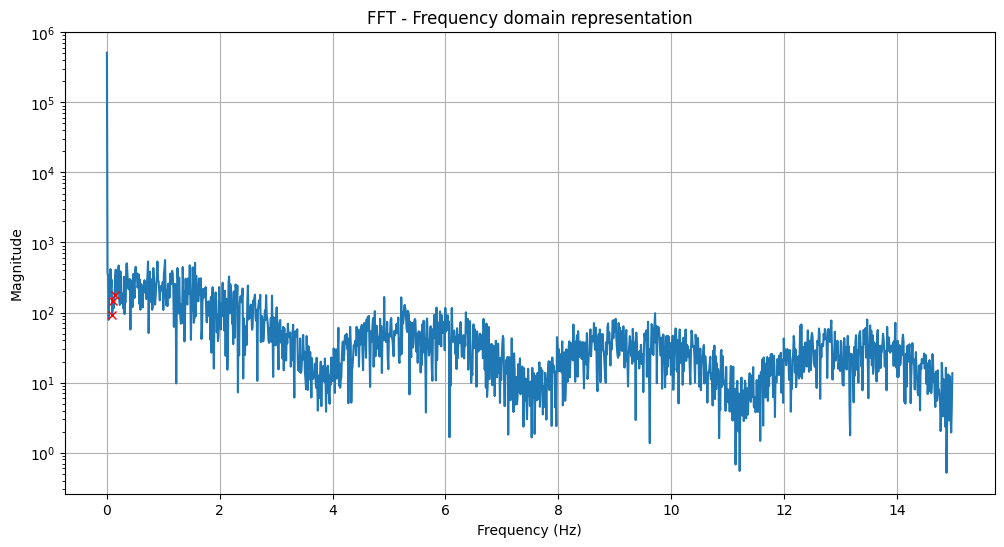

In [59]:
from scipy.signal import find_peaks

# Continue from your existing code...

# Use the find_peaks function to identify peaks
peaks, _ = find_peaks(fft_magnitude[:half_size], distance=5)  # Adjust distance as necessary

# Sort the peaks by amplitude in descending order and take the first three
top_peaks_indices = np.argsort(fft_magnitude[peaks])[-3:][::-1]

# Print the frequency and magnitude of each of the top peaks
for peak_index in top_peaks_indices:
    peak = peaks[peak_index]
    print(f"Frequency: {fft_frequency[peak]} Hz")
    print(f"Amplitude: {fft_magnitude[peak]}")

# Plot the first half of the frequencies (the second half is the mirror image)
plt.figure(figsize=(12, 6))
plt.plot(fft_frequency[:half_size], fft_magnitude[:half_size])

# Mark the top peaks
plt.plot(fft_frequency[top_peaks_indices], fft_magnitude[top_peaks_indices], "rx")

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.yscale('log')  # Change y-axis to logarithmic scale
plt.title('FFT - Frequency domain representation')
plt.grid()
plt.show()


Frequency: 1.0308920513710518 Hz
Amplitude: 562.7492101297946
Frequency: 0.7289135716765012 Hz
Amplitude: 534.8750824900428
Frequency: 0.8955223880597014 Hz
Amplitude: 534.2776463740857


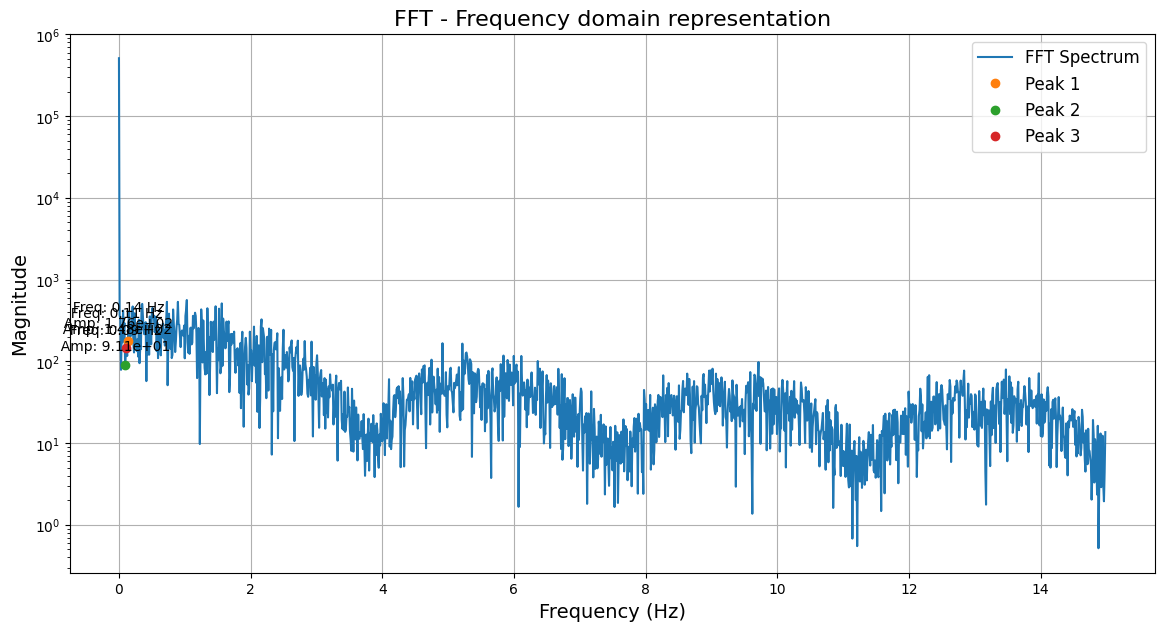

In [60]:
from scipy.signal import find_peaks

# Continue from your existing code...

# Use the find_peaks function to identify peaks
peaks, _ = find_peaks(fft_magnitude[:half_size], distance=5)  # Adjust distance as necessary

# Sort the peaks by amplitude in descending order and take the first three
top_peaks_indices = np.argsort(fft_magnitude[peaks])[-3:][::-1]

# Print the frequency and magnitude of each of the top peaks
for peak_index in top_peaks_indices:
    peak = peaks[peak_index]
    print(f"Frequency: {fft_frequency[peak]} Hz")
    print(f"Amplitude: {fft_magnitude[peak]}")

# Plot the first half of the frequencies (the second half is the mirror image)
plt.figure(figsize=(14, 7))  # Adjust size to fit thesis layout
plt.plot(fft_frequency[:half_size], fft_magnitude[:half_size], label='FFT Spectrum')

# Mark the top peaks
for i, peak_index in enumerate(top_peaks_indices):
    plt.plot(fft_frequency[peak_index], fft_magnitude[peak_index], "o", label=f'Peak {i+1}')
    plt.annotate(f"  Freq: {fft_frequency[peak_index]:.2f} Hz\n  Amp: {fft_magnitude[peak_index]:.2e}",
                 (fft_frequency[peak_index], fft_magnitude[peak_index]),
                 textcoords="offset points", xytext=(-10,10), ha='center')

plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.yscale('log')  # Change y-axis to logarithmic scale
plt.title('FFT - Frequency domain representation', fontsize=16)
plt.grid()
plt.legend(loc='best', fontsize=12)
plt.show()
